In [10]:
# Imports -  These are all you need for the assignment: do not import additional packages
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Note: the statsmodels import may print out a 'FutureWarning'. Thats fine.
# do more expensive airbnbs have better ratings than cheaper ones?? 
# expand: which area ?? 

C:\Users\kukidex\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
may_2014 = pd.read_csv(open('tomslee_airbnb_san_diego_0033_2014-05-25.csv')) #, header=None)
november_2014 = pd.read_csv(open('tomslee_airbnb_san_diego_0063_2014-11-03.csv')) #, header=None)
august_2015 = pd.read_csv(open('tomslee_airbnb_san_diego_0142_2015-08-22.csv')) #, header=None)
october1_2015 = pd.read_csv(open('tomslee_airbnb_san_diego_0169_2015-10-03.csv')) #, header=None)
october2_2015 = pd.read_csv(open('tomslee_airbnb_san_diego_0187_2015-10-23.csv')) #, header=None)
december1_2015 = pd.read_csv(open('tomslee_airbnb_san_diego_0222_2015-12-03.csv')) #, header=None)
december2_2015 = pd.read_csv(open('tomslee_airbnb_san_diego_0242_2015-12-16.csv')) #, header=None)
january_2016 = pd.read_csv(open('tomslee_airbnb_san_diego_0289_2016-01-19.csv')) #, header=None)
february_2016 = pd.read_csv(open('tomslee_airbnb_san_diego_0328_2016-02-22.csv')) #, header=None)
march_2016 = pd.read_csv(open('tomslee_airbnb_san_diego_0351_2016-03-23.csv')) #, header=None)
april_2016 = pd.read_csv(open('tomslee_airbnb_san_diego_0393_2016-04-18.csv')) #, header=None)
may_2016 = pd.read_csv(open('tomslee_airbnb_san_diego_0427_2016-05-22.csv')) #, header=None)
june_2016 = pd.read_csv(open('tomslee_airbnb_san_diego_0468_2016-06-21.csv')) #, header=None)
july_2016 = pd.read_csv(open('tomslee_airbnb_san_diego_0496_2016-07-19.csv')) #, header=None)
august_2016 = pd.read_csv(open('tomslee_airbnb_san_diego_0531_2016-08-22.csv')) #, header=None)
september_2016 = pd.read_csv(open('tomslee_airbnb_san_diego_0573_2016-09-19.csv')) #, header=None)
october_2016 = pd.read_csv(open('tomslee_airbnb_san_diego_0617_2016-10-22.csv')) #, header=None)
november_2016 = pd.read_csv(open('tomslee_airbnb_san_diego_0656_2016-11-25.csv')) #, header=None)
december_2016 = pd.read_csv(open('tomslee_airbnb_san_diego_0713_2016-12-25.csv')) #, header=None)
january_2017 = pd.read_csv(open('tomslee_airbnb_san_diego_0786_2017-01-15.csv')) #, header=None)
february_2017 = pd.read_csv(open('tomslee_airbnb_san_diego_0865_2017-02-17.csv')) #, header=None)
april_2017 = pd.read_csv(open('tomslee_airbnb_san_diego_1050_2017-04-09.csv')) #, header=None)
may_2017 = pd.read_csv(open('tomslee_airbnb_san_diego_1194_2017-05-06.csv')) #, header=None)
june_2017 = pd.read_csv(open('tomslee_airbnb_san_diego_1316_2017-06-11.csv')) #, header=None)
july_2017 = pd.read_csv(open('tomslee_airbnb_san_diego_1436_2017-07-11.csv')) #, header=None)

# merge all datasets together
df_2014 = [may_2014, november_2014]
df_2015 = [august_2015, october1_2015, october2_2015, december1_2015, december2_2015]
df_2016 = [january_2016, february_2016, march_2016, april_2016, may_2016, june_2016, july_2016, august_2016, september_2016, october_2016, november_2016, december_2016]
df_2017 = [january_2017, february_2017, april_2017, may_2017, july_2017]
df = pd.concat(df_2014 + df_2015 + df_2016 + df_2017)
df = df.dropna(subset = ['overall_satisfaction','price'])
df
#dataset.drop(['room_id','host_id', 'borough', 'latitude', 'longitude', 'last_modified'], axis=1, inplace=True)

#print(dataset)

#minval = dataset['price'].min()

#maxval = dataset['price'].max()

#print (minval)
#print (maxval)

# drop latitude, longitude, borough, room_id, host_id, last_modified 

,accommodates,bathrooms,bedrooms,borough,city,country,host_id,last_modified,latitude,location,longitude,minstay,neighborhood,overall_satisfaction,price,reviews,room_id,room_type,survey_id
1,2.0,NaN,NaN,NaN,NaN,NaN,270.0,2014-05-25 15:22:10.890,32.735170,NaN,-117.243793,2.0,Ocean Beach,5.0,77.0,118.0,8095,Entire home/apt,NaN
2,4.0,NaN,2.0,NaN,NaN,NaN,25186.0,2014-05-25 14:22:38.609,32.728386,NaN,-117.128238,2.0,South Park,5.0,280.0,29.0,8488,Entire home/apt,NaN
3,2.0,NaN,1.0,NaN,NaN,NaN,31656.0,2014-05-25 14:37:52.088,32.753266,NaN,-117.141208,1.0,North Hills,5.0,112.0,2.0,9553,Private room,NaN
4,2.0,NaN,1.0,NaN,NaN,NaN,57636.0,2014-05-25 14:36:11.889,32.931104,NaN,-117.152685,1.0,Mira Mesa,5.0,69.0,120.0,14668,Private room,NaN
5,3.0,NaN,1.0,NaN,NaN,NaN,154512.0,2014-05-25 15:18:15.152,32.724052,NaN,-117.128512,7.0,South Park,5.0,151.0,58.0,35989,Entire home/apt,NaN
6,2.0,NaN,1.0,NaN,NaN,NaN,164137.0,2014-05-25 14:45:12.250,32.742020,NaN,-117.218701,1.0,Roseville,4.5,62.0,51.0,38245,Private room,NaN
7,2.0,NaN,1.0,NaN,NaN,NaN,169649.0,2014-05-25 14:42:13.922,32.731884,NaN,-117.119180,3.0,North Hills,5.0,73.0,127.0,39516,Private room,NaN
8,2.0,NaN,1.0,NaN,NaN,NaN,197919.0,2014-05-25 15:05:44.880,32.748768,NaN,-117.229371,2.0,Loma Portal,4.5,179.0,5.0,45429,Entire home/apt,NaN
9,2.0,NaN,1.0,NaN,NaN,NaN,252692.0,2014-05-25 15:57:50.348,32.812293,NaN,-117.267067,1.0,La Jolla,5.0,140.0,34.0,54001,Private room,NaN
10,2.0,NaN,1.0,NaN,NaN,NaN,302986.0,2014-05-25 14:33:21.153,32.807337,NaN,-117.242432,2.0,Pacific Beach,5.0,100.0,158.0,62274,Private room,NaN


209    0.0
Name: overall_satisfaction, dtype: float64


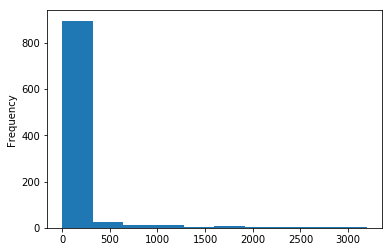

In [17]:
print(df[df.price==df['price'].max()].overall_satisfaction)
df['price'].value_counts().plot.hist()

a = plt.gcf()

In [ ]:
# create dictionary where key is neighborhood and value is number of times it popped up in listing 
# bias could be generated based off of number of reviews and corresponding satisfaction level
# 